Statlog (German Credit Data) Data Set
---
This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix.

https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

In [2]:
df = pd.read_table("german.data.txt", delimiter=' ', names=[
    'Status of existing checking account',
    'Duration in month',
    'Credit history',
    'Purpose',
    'Credit amount',
    'Savings account/bonds',
    'Present employment since',
    'Installment rate in percentage of disposable income',
    'Personal status and sex',
    'Other debtors / guarantors',
    'Present residence since',
    'Property',
    'Age in years',
    'Other installment plans',
    'Housing',
    'Number of existing credits at this bank',
    'Job',
    'Number of people being liable to provide maintenance for',
    'Telephone',
    'foreign worker', 'target'])
df.head()

Status of existing checking account  Duration in month Credit history  \
0                                 A11                  6            A34   
1                                 A12                 48            A32   
2                                 A14                 12            A34   
3                                 A11                 42            A32   
4                                 A11                 24            A33   

  Purpose  Credit amount Savings account/bonds Present employment since  \
0     A43           1169                   A65                      A75   
1     A43           5951                   A61                      A73   
2     A46           2096                   A61                      A74   
3     A42           7882                   A61                      A74   
4     A40           4870                   A61                      A73   

   Installment rate in percentage of disposable income  \
0                                                  4     
1                                                  2     
2                                                  2     
3                                                  2     
4                                                  3     

  Personal status and sex Other debtors / guarantors  ...    Property  \
0                     A93                       A101  ...        A121   
1                     A92                       A101  ...        A121   
2                     A93                       A101  ...        A121   
3                     A93                       A103  ...        A122   
4                     A93                       A101  ...        A124   

  Age in years  Other installment plans Housing  \
0           67                     A143    A152   
1           22                     A143    A152   
2           49                     A143    A152   
3           45                     A143    A153   
4           53                     A143    A153   

  Number of existing credits at this bank   Job  \
0                                       2  A173   
1                                       1  A173   
2                                       1  A172   
3                                       1  A173   
4                                       2  A173   

  Number of people being liable to provide maintenance for  Telephone  \
0                                                  1             A192   
1                                                  1             A191   
2                                                  2             A191   
3                                                  2             A191   
4                                                  2             A191   

  foreign worker target  
0           A201      1  
1           A201      2  
2           A201      1  
3           A201      1  
4           A201      2  

[5 rows x 21 columns]

In [3]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Status of existing checking account                         1000 non-null object
Duration in month                                           1000 non-null int64
Credit history                                              1000 non-null object
Purpose                                                     1000 non-null object
Credit amount                                               1000 non-null int64
Savings account/bonds                                       1000 non-null object
Present employment since                                    1000 non-null object
Installment rate in percentage of disposable income         1000 non-null int64
Personal status and sex                                     1000 non-null object
Other debtors / guarantors                                  1000 non-null object
Present residence since                                     1000 non-null int64
Propert

A lot of varibles are object, which should be converted to category encoding or one hot encoding if no magnitude relation

In [4]:
df = pd.get_dummies(df, columns=['Status of existing checking account'])
df['Credit history'] = df['Credit history'].astype('category').cat.codes
df = pd.get_dummies(df, columns=['Purpose'])
df = pd.get_dummies(df, columns=['Savings account/bonds'])
df['Present employment since'] = df['Present employment since'].astype('category').cat.codes
df = pd.get_dummies(df, columns=['Personal status and sex'])
df['Other debtors / guarantors'] = df['Other debtors / guarantors'].astype('category').cat.codes
df = pd.get_dummies(df, columns=['Property'])
df = pd.get_dummies(df, columns=['Other installment plans'])
df = pd.get_dummies(df, columns=['Housing'])
df['Job'] = df['Job'].astype('category').cat.codes
df = pd.get_dummies(df, columns=['Telephone'])
df = pd.get_dummies(df, columns=['foreign worker'])
df.head()

Duration in month  Credit history  Credit amount  Present employment since  \
0                  6               4           1169                         4   
1                 48               2           5951                         2   
2                 12               4           2096                         3   
3                 42               2           7882                         3   
4                 24               3           4870                         2   

   Installment rate in percentage of disposable income  \
0                                                  4     
1                                                  2     
2                                                  2     
3                                                  2     
4                                                  3     

   Other debtors / guarantors  Present residence since  Age in years  \
0                           0                        4            67   
1                           0                        2            22   
2                           0                        3            49   
3                           2                        4            45   
4                           0                        4            53   

   Number of existing credits at this bank  Job         ...           \
0                                        2    2         ...            
1                                        1    2         ...            
2                                        1    1         ...            
3                                        1    2         ...            
4                                        2    2         ...            

   Other installment plans_A141  Other installment plans_A142  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   Other installment plans_A143  Housing_A151  Housing_A152  Housing_A153  \
0                             1             0             1             0   
1                             1             0             1             0   
2                             1             0             1             0   
3                             1             0             0             1   
4                             1             0             0             1   

   Telephone_A191  Telephone_A192  foreign worker_A201  foreign worker_A202  
0               0               1                    1                    0  
1               1               0                    1                    0  
2               1               0                    1                    0  
3               1               0                    1                    0  
4               1               0                    1                    0  

[5 rows x 49 columns]

In [5]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 49 columns):
Duration in month                                           1000 non-null int64
Credit history                                              1000 non-null int8
Credit amount                                               1000 non-null int64
Present employment since                                    1000 non-null int8
Installment rate in percentage of disposable income         1000 non-null int64
Other debtors / guarantors                                  1000 non-null int8
Present residence since                                     1000 non-null int64
Age in years                                                1000 non-null int64
Number of existing credits at this bank                     1000 non-null int64
Job                                                         1000 non-null int8
Number of people being liable to provide maintenance for    1000 non-null int64
target            

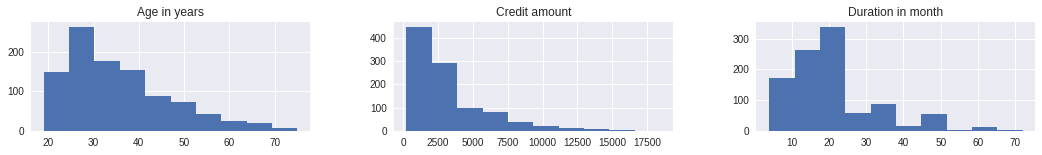

In [6]:
df[['Age in years', 'Credit amount', 'Duration in month']].hist(layout=(1,3), figsize=(18,2));

Visualizing the continuous varibles we se that the first two have a long tail and the last have a lot of outliers

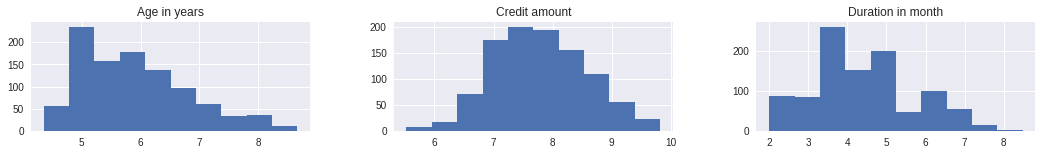

In [7]:
df.loc[:, 'Age in years'] = df['Age in years'].apply(np.sqrt)
df.loc[:, 'Credit amount'] = df['Credit amount'].apply(np.log1p)
df.loc[:, 'Duration in month'] = df['Duration in month'].apply(np.sqrt)
df[['Age in years', 'Credit amount', 'Duration in month']].hist(layout=(1,3), figsize=(18,2));

In [8]:
df.describe().T

count      mean  \
Duration in month                                   1000.0  4.393683   
Credit history                                      1000.0  2.545000   
Credit amount                                       1000.0  7.789244   
Present employment since                            1000.0  2.384000   
Installment rate in percentage of disposable in...  1000.0  2.973000   
Other debtors / guarantors                          1000.0  0.145000   
Present residence since                             1000.0  2.845000   
Age in years                                        1000.0  5.891983   
Number of existing credits at this bank             1000.0  1.407000   
Job                                                 1000.0  1.904000   
Number of people being liable to provide mainte...  1000.0  1.155000   
target                                              1000.0  1.300000   
Status of existing checking account_A11             1000.0  0.274000   
Status of existing checking account_A12             1000.0  0.269000   
Status of existing checking account_A13             1000.0  0.063000   
Status of existing checking account_A14             1000.0  0.394000   
Purpose_A40                                         1000.0  0.234000   
Purpose_A41                                         1000.0  0.103000   
Purpose_A410                                        1000.0  0.012000   
Purpose_A42                                         1000.0  0.181000   
Purpose_A43                                         1000.0  0.280000   
Purpose_A44                                         1000.0  0.012000   
Purpose_A45                                         1000.0  0.022000   
Purpose_A46                                         1000.0  0.050000   
Purpose_A48                                         1000.0  0.009000   
Purpose_A49                                         1000.0  0.097000   
Savings account/bonds_A61                           1000.0  0.603000   
Savings account/bonds_A62                           1000.0  0.103000   
Savings account/bonds_A63                           1000.0  0.063000   
Savings account/bonds_A64                           1000.0  0.048000   
Savings account/bonds_A65                           1000.0  0.183000   
Personal status and sex_A91                         1000.0  0.050000   
Personal status and sex_A92                         1000.0  0.310000   
Personal status and sex_A93                         1000.0  0.548000   
Personal status and sex_A94                         1000.0  0.092000   
Property_A121                                       1000.0  0.282000   
Property_A122                                       1000.0  0.232000   
Property_A123                                       1000.0  0.332000   
Property_A124                                       1000.0  0.154000   
Other installment plans_A141                        1000.0  0.139000   
Other installment plans_A142                        1000.0  0.047000   
Other installment plans_A143                        1000.0  0.814000   
Housing_A151                                        1000.0  0.179000   
Housing_A152                                        1000.0  0.713000   
Housing_A153                                        1000.0  0.108000   
Telephone_A191                                      1000.0  0.596000   
Telephone_A192                                      1000.0  0.404000   
foreign worker_A201                                 1000.0  0.963000   
foreign worker_A202                                 1000.0  0.037000   

                                                         std       min  \
Duration in month                                   1.264971  2.000000   
Credit history                                      1.083120  0.000000   
Credit amount                                       0.776074  5.525453   
Present employment since                            1.208306  0.000000   
Installment rate in percentage of disposable in...  1.118715  1.000000   
Other de

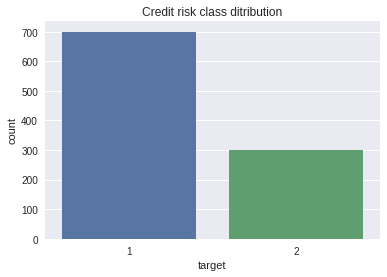

In [9]:
ax = sns.countplot(data=df, x='target')
ax.set_title("Credit risk class ditribution");

In [10]:
df.isnull().sum()

Duration in month                                           0
Credit history                                              0
Credit amount                                               0
Present employment since                                    0
Installment rate in percentage of disposable income         0
Other debtors / guarantors                                  0
Present residence since                                     0
Age in years                                                0
Number of existing credits at this bank                     0
Job                                                         0
Number of people being liable to provide maintenance for    0
target                                                      0
Status of existing checking account_A11                     0
Status of existing checking account_A12                     0
Status of existing checking account_A13                     0
Status of existing checking account_A14                     0
Purpose_

In [11]:
df['ratio'] = df['Credit amount']/df['Age in years']
#df.query("ratio").head(100).style.background_gradient(cmap='viridis')

In [12]:
X = df.drop('target', axis=1)
y = df["target"].values - 1

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedKFold, cross_val_score, StratifiedShuffleSplit, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline

In [14]:
X = MinMaxScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
clf_dummy = DummyClassifier(strategy="most_frequent")
clf_dummy.fit(X_train, y_train)
print(clf_dummy.score(X_test, y_test))

0.693939393939394


Create new features

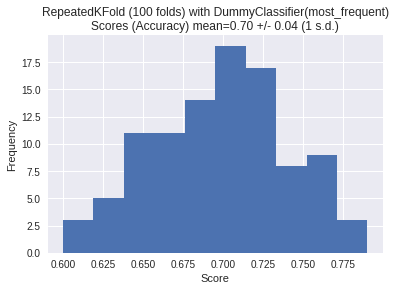

In [16]:
scores = cross_val_score(clf_dummy, 
                         X, y, 
                         cv=RepeatedKFold(10))
scores_dummy = scores
score_line = "Scores (Accuracy) mean={0:0.2f} +/- {1:0.2f} (1 s.d.)".format(scores.mean(), scores.std())
fig, ax = plt.subplots()
pd.Series(scores).hist(ax=ax, bins=10)
ax.set_title("RepeatedKFold ({0} folds) with DummyClassifier(most_frequent)\n{1}".format(len(scores), score_line))
ax.set_xlabel("Score")
ax.set_ylabel("Frequency");

In [17]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)
print(classification_report(y_test, clf.predict(X_test), target_names=['Good', 'Bad']))

             precision    recall  f1-score   support

       Good       0.79      0.90      0.84       229
        Bad       0.67      0.47      0.55       101

avg / total       0.76      0.77      0.75       330



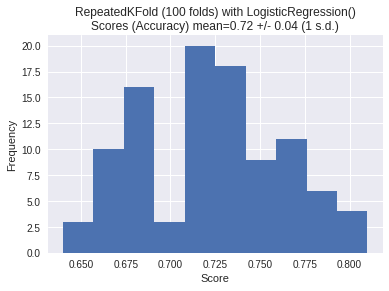

In [21]:
scores = cross_val_score(clf, 
                         X, y, 
                         cv=RepeatedKFold(10))
scores_lgt = scores
score_line = "Scores (Accuracy) mean={0:0.2f} +/- {1:0.2f} (1 s.d.)".format(scores.mean(), scores.std())
fig, ax = plt.subplots()
pd.Series(scores).hist(ax=ax, bins=10)
ax.set_title("RepeatedKFold ({0} folds) with LogisticRegression()\n{1}".format(len(scores), score_line))
ax.set_xlabel("Score")
ax.set_ylabel("Frequency");

ValueError: Mix type of y not allowed, got types {'continuous', 'binary'}

In [19]:
clf = LinearSVC(random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)
print(classification_report(y_test, clf.predict(X_test), target_names=['Good', 'Bad']))

             precision    recall  f1-score   support

       Good       0.86      0.72      0.79       229
        Bad       0.54      0.74      0.63       101

avg / total       0.77      0.73      0.74       330



In [20]:
scores = cross_val_score(clf, 
                         X, y, 
                         cv=RepeatedKFold(10))
scores_linear = scores
score_line = "Scores (Accuracy) mean={0:0.2f} +/- {1:0.2f} (1 s.d.)".format(scores.mean(), scores.std())
fig, ax = plt.subplots()
pd.Series(scores).hist(ax=ax, bins=10)
ax.set_title("RepeatedKFold ({0} folds) with LinearSVC()\n{1}".format(len(scores), score_line))
ax.set_xlabel("Score")
ax.set_ylabel("Frequency");

In [195]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [196]:
tsne = TSNE(n_components=2, random_state=0)
ttsne = tsne.fit_transform(X_train)

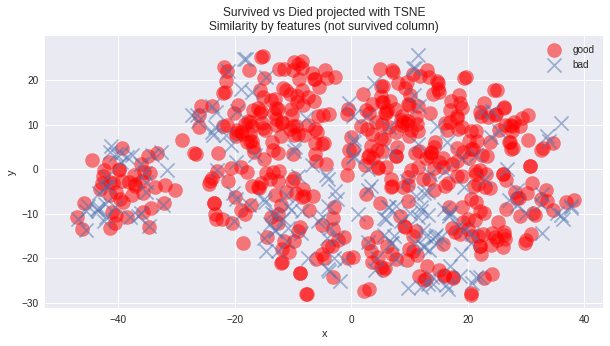

In [200]:
df_tsne = pd.DataFrame(ttsne, columns=['x', 'y'])
df_tsne['risk'] = y_train
alpha=.5
fig, ax = plt.subplots(figsize=(10,5))
df_tsne_scatter = df_tsne.query("risk==0")
df_tsne_scatter.plot(kind="scatter", x="x", y="y", marker="o", s=200, color='red',
                                ax=ax, alpha=alpha, label="good")
df_tsne_scatter = df_tsne.query("risk==1")
df_tsne_scatter.plot(kind="scatter", x="x", y="y", marker="x",s=200,
                                label="bad", alpha=alpha, ax=ax)
ax.legend()
ax.set_title("good vs bad projected with TSNE");

In [201]:
pca = PCA(n_components=2, random_state=0)
tpca = pca.fit_transform(X_train)

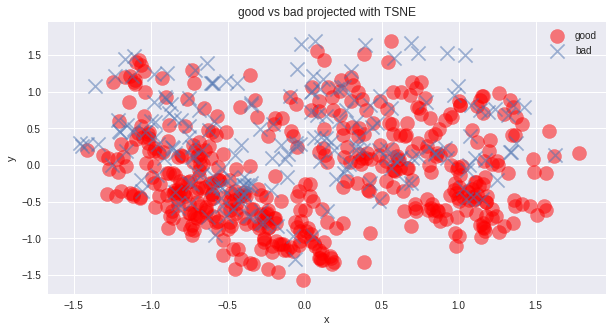

In [204]:
df_pca = pd.DataFrame(tpca, columns=['x', 'y'])
df_pca['risk'] = y_train
alpha=.5
fig, ax = plt.subplots(figsize=(10,5))
df_pca_scatter = df_pca.query("risk==0")
df_pca_scatter.plot(kind="scatter", x="x", y="y", marker="o", s=200, color='red',
                                ax=ax, alpha=alpha, label="good")
df_pca_scatter = df_pca.query("risk==1")
df_pca_scatter.plot(kind="scatter", x="x", y="y", marker="x",s=200,
                                label="bad", alpha=alpha, ax=ax)
ax.legend()
ax.set_title("good vs bad projected with TSNE");

http://scikit-learn.org/stable/modules/feature_selection.html#tree-based-feature-selection
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html#sklearn.decomposition.TruncatedSVD
http://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition

In [199]:
sc = MinMaxScaler()
skb = SelectKBest()
lr = LogisticRegression(random_state=42)
pipe2 = Pipeline(steps=[
    ("Scaler", sc),
    ("SKBest", skb),
    ("LR", lr)
    ])

params = {
    "LR__C":[1, 10, 100, 200, 300, 1000],
    "LR__tol":[1e-8, 1e-7, 1e-6, 1e-5, 1e-4],
    "LR__class_weight":['balanced'],
    "SKBest__k": list(range(1, 20)) + ['all']
    }

shuff = StratifiedShuffleSplit(n_splits = 50, random_state=42)

clf2 = GridSearchCV(
    pipe2,
    param_grid=params,
    cv=shuff,
    verbose=1,
    n_jobs=4
    )

print("lr final")
clf2.fit(X_train, y_train)
print("atributes", clf2.best_params_)
print(classification_report(y_test, clf2.predict(X_test)))

lr final
Fitting 50 folds for each of 600 candidates, totalling 30000 fits


[Parallel(n_jobs=4)]: Done 416 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 2216 tasks      | elapsed:   14.5s
[Parallel(n_jobs=4)]: Done 5216 tasks      | elapsed:   33.0s
[Parallel(n_jobs=4)]: Done 9416 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 14816 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 21416 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done 29216 tasks      | elapsed:  3.2min


atributes {'LR__C': 1000, 'LR__class_weight': 'balanced', 'SKBest__k': 17, 'LR__tol': 1e-08}
             precision    recall  f1-score   support

          0       0.85      0.72      0.78       229
          1       0.53      0.71      0.61       101

avg / total       0.75      0.72      0.73       330



[Parallel(n_jobs=4)]: Done 30000 out of 30000 | elapsed:  3.3min finished
